## Time Series Analysis Part 1

Time series analysis focuses on analyzing data changes that occur at equally spaced time intervals so we can understand what factors produced past results so that we can forecast future results.

Time series analysis is used to forecast the stock market, economic outlook, and numerous other business and scientific based projects.

I'll be using a combination of Python data science libraries including Numpy, Pandas, StatsModels, Seaborn and Plotly. Numpy and Pandas will be used to work with data. StatsModels will provide many time series statistical analysis functions. Seaborn and Plotly will be used for visualizations.

### Imports

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import chart_studio.plotly as py
import plotly.express as px
# Provides classes for working with dates and times
from datetime import datetime


### Pandas Datetime Index

In [34]:
# Generate dates from start to 15 days with nanosecond accuracy
pd.date_range('2020-10-01',periods=15,freq='D')
# You can also input month name
pd.date_range('Oct 01, 2020',periods=15,freq='D')
# Pass in strings to convert to datetimes
# format allows you to define "%d/%m/%Y"
pd.to_datetime(['10/01/2020', '10/02/2020'])

# Create 3x3 matrix with random values between 10 and 50
arr_1 = np.random.randint(10, 50, size=(3,3))
# Generate 3 consecutive dates
date_arr = pd.date_range('2020-01-01',periods=3,freq='D')
# Create dataframe with columns named ABC and rows labeled
# with the dates
df_1 = pd.DataFrame(arr_1, columns=['A','B','C'], index=date_arr)
df_1

# Get min & max datetimes and indexes
df_1.index.min()
df_1.index.max()
df_1.index.argmin()
df_1.index.argmax()

2

### Time Resampling

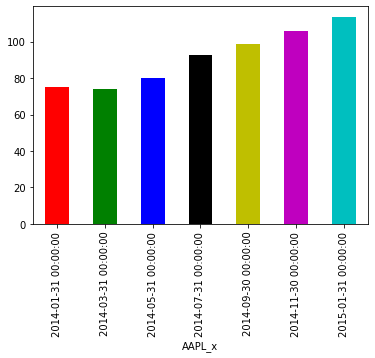

In [83]:
# Import stock data from a CSV file
df_appl = pd.read_csv('appl.csv')
# Print a chart
px.line(df_appl, x='AAPL_x', y='AAPL_y', 
        labels={'x':'Date', 'y':'Price'})
df_appl.head()

# We can set the date as an index and treat as a date rather
# than a string
df_appl = pd.read_csv('appl.csv', index_col='AAPL_x', 
                     parse_dates=True)
df_appl

# Generate a random 240 item array for volume data
arr_2 = np.random.randint(86000000, 256000000, size=240)
# Add volume data to dataframe
df_appl['Volume'] = arr_2
# Rename column AAPL_y Price
df_appl.rename(columns={'AAPL_y':'Price'}, inplace = True)
df_appl

# Get the average price and volume over the year 'A'
# Try min, max, sum, std
df_appl.resample(rule='A').mean()

# Get standard deviation just on the price
df_appl['Price'].resample('A').std()

# Get weekly, monthly, biweekly, quarterly mean
# Also D (Day), H (Hour), T (Minute), S (Second), L (Millisecond)
# U (Microsecond)
df_appl['Price'].resample(rule='W').mean()
df_appl['Price'].resample(rule='M').mean()
df_appl['Price'].resample(rule='SM').mean()
df_appl['Price'].resample(rule='Q').mean()
# Bimonthly plus a bar plot with a list of colors
df_appl['Price'].resample(rule='2M').mean().plot.bar(color=list('rgbkymc')) 

### Moving Average

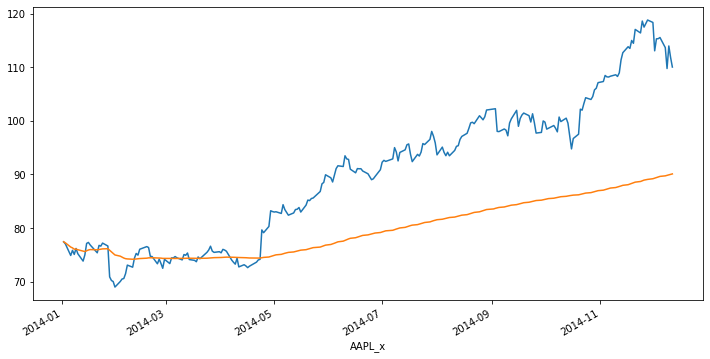

In [93]:
df_appl['Price'].plot(figsize=(12,6))

# Use weekly data to create a rolling average
# df_appl.rolling(window=7).mean()['Price'].plot()

# Use monthly data to create a rolling average
# df_appl.rolling(window=30).mean()['Price'].plot()

# Show average of everything that came before it
df_appl['Price'].expanding().mean().plot(figsize=(12,6))

### Shifting Time Data

In [82]:
# Shift data down 1 row
# df_appl = df_appl.shift(1) to make permanent
df_appl.shift(1)
# Shift data up 1 row
df_appl.shift(-1)

,Price,Volume
AAPL_x,,
2014-01-02,77.045575,196628650.0
2014-01-03,74.896972,245821915.0
2014-01-06,75.856461,239428968.0
2014-01-07,75.091947,156932971.0
2014-01-08,76.202632,180823841.0
...,...,...
2014-12-08,109.755497,238358741.0
2014-12-09,113.960331,110912744.0
2014-12-10,111.817477,91631939.0
